<img src="../../../images/banners/mpl.jpg" width="500"/>

<a class="anchor" id="image_tutorial"></a>
# <img src="../../../images/logos/mpl.png" width="23"/>  Image tutorial

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 

* [Startup commands](#startup_commands)
* [Importing image data into Numpy arrays](#importing_image_data_into_numpy_arrays)
* [Plotting numpy arrays as images](#plotting_numpy_arrays_as_images)
    * [Applying pseudocolor schemes to image plots](#applying_pseudocolor_schemes_to_image_plots)
    * [Color scale reference](#color_scale_reference)
    * [Examining a specific data range](#examining_a_specific_data_range)
    * [Array Interpolation schemes](#array_interpolation_schemes)

---

A short tutorial on plotting images with Matplotlib.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

<a class="anchor" id="startup_commands"></a>
## Startup commands

This tutorial will use Matplotlib's implicit plotting interface, pyplot. This
interface maintains global state, and is very useful for quickly and easily
experimenting with various plot settings. The alternative is the explicit,
which is more suitable for large application development. For an explanation
of the tradeoffs between the implicit and explicit interfaces see
Matplotlib Application Interfaces (APIs) section to start using the explicit interface.
For now, let's get on with the implicit approach:

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<a class="anchor" id="importing_image_data_into_numpy_arrays"></a>
## Importing image data into Numpy arrays

Matplotlib relies on the [Pillow](https://pillow.readthedocs.io/en/latest/) library to load image data.

Here's the image we're going to play with: [Clashes as thousands attend Mahsa Amini memorial in Iran’s Saqqez](https://www.aljazeera.com/news/2022/10/26/clashes-thousands-attend-mahsa-amini-memorial-iran-saqqez)

<img src="../images/iran_1401.jpg" width="500px">

It's a 24-bit RGB JPG image (8 bits for each of R, G, B). Depending on where you get your data, the other kinds of image that you'll most likely encounter are RGBA images, which allow for transparency, or single-channel grayscale (luminosity) images. Download stinkbug.png to your computer for the rest of this tutorial.

And here we go...

In [39]:
img = mpimg.imread('../images/iran_1401.jpg')

In [40]:
img.shape

(674, 1199, 3)

In [41]:
img

array([[[163, 175, 201],
        [163, 175, 201],
        [163, 175, 201],
        ...,
        [162, 179, 205],
        [161, 178, 204],
        [160, 177, 203]],

       [[163, 175, 201],
        [163, 175, 201],
        [163, 175, 201],
        ...,
        [162, 179, 205],
        [161, 178, 204],
        [160, 177, 203]],

       [[163, 175, 201],
        [163, 175, 201],
        [163, 175, 201],
        ...,
        [162, 179, 205],
        [161, 178, 204],
        [160, 177, 203]],

       ...,

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 23,  22,  27],
        [ 39,  38,  43],
        [ 17,  16,  21]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 27,  26,  31],
        [ 29,  28,  33],
        [ 31,  30,  35]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 27,  26,  31],
        [ 29,  28,  33],
        [ 31,  30,  35]]

Note the dtype there - uint8. As a side note, the only datatype that Pillow can work with is `uint8`. Matplotlib plotting can handle `float32` and `uint8`, but image reading/writing for any format other than PNG is limited to `uint8` data. Why 8 bits? Most displays can only render 8 bits per channel worth of color gradation. Why can they only render 8 bits/channel? Because that's about all the human eye can see. More here (from a photography standpoint): Luminous Landscape bit depth tutorial.

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. For a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency) has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, Matplotlib supports float32 and uint8 data types. For grayscale, Matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

<a class="anchor" id="plotting_numpy_arrays_as_images"></a>
## Plotting numpy arrays as images

So, you have your data in a numpy array (either by importing it, or by
generating it). Let's render it. In Matplotlib, this is performed
using the [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow "matplotlib.pyplot.imshow") function. Here we'll grab
the plot object. This object gives you an easy way to manipulate the
plot from the prompt.

You can also plot any numpy array.

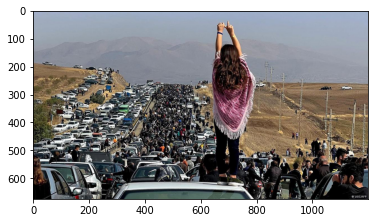

In [9]:
imgplot = plt.imshow(img)

You can also plot any numpy array.

<a class="anchor" id="applying_pseudocolor_schemes_to_image_plots"></a>
### Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily. This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images. We currently have an RGB image. So we can just pick one
channel of our data using array slicing (you can read more in the
[Numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html#indexing-slicing-and-iterating)):

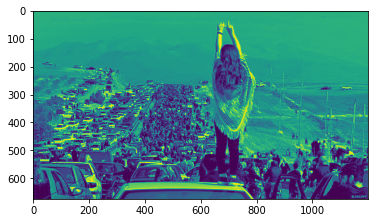

In [18]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table,
LUT), is applied. The default is called viridis. There are plenty of
others to choose from.

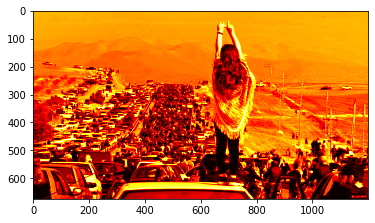

In [24]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the
[`set_cmap()`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable.set_cmap "matplotlib.cm.ScalarMappable.set_cmap") method:

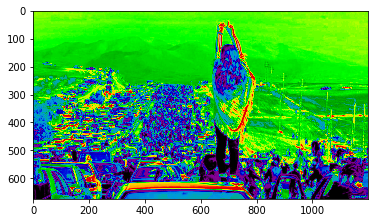

In [20]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

> **Note:** However, remember that in the Jupyter Notebook with the inline backend,
you can't make changes to plots that have already been rendered. If you
create imgplot here in one cell, you cannot call set_cmap() on it in a later
cell and expect the earlier plot to change. Make sure that you enter these
commands together in one cell. plt commands will not change plots from earlier
cells.

There are many other colormap schemes available. See the [list and
images of the colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

<a class="anchor" id="color_scale_reference"></a>
### Color scale reference

It's helpful to have an idea of what value a color represents. We can
do that by adding a color bar to your figure:

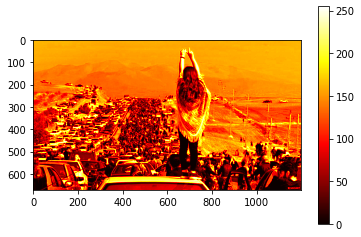

In [22]:
plt.imshow(lum_img, cmap="hot")
plt.colorbar()

<a class="anchor" id="array_interpolation_schemes"></a>
### Array Interpolation schemes

Interpolation calculates what the color or value of a pixel "should"
be, according to different mathematical schemes. One common place
that this happens is when you resize an image. The number of pixels
change, but you want the same information. Since pixels are discrete,
there's missing space. Interpolation is how you fill that space.
This is why your images sometimes come out looking pixelated when you
blow them up. The effect is more pronounced when the difference
between the original image and the expanded image is greater. Let's
take our image and shrink it. We're effectively discarding pixels,
only keeping a select few. Now when we plot it, that data gets blown
up to the size on your screen. The old pixels aren't there anymore,
and the computer has to draw in pixels to fill that space.

We'll use the Pillow library that we used to load the image also to resize
the image.

In [44]:
from PIL import Image

img = Image.open('../images/iran_1401.jpg')

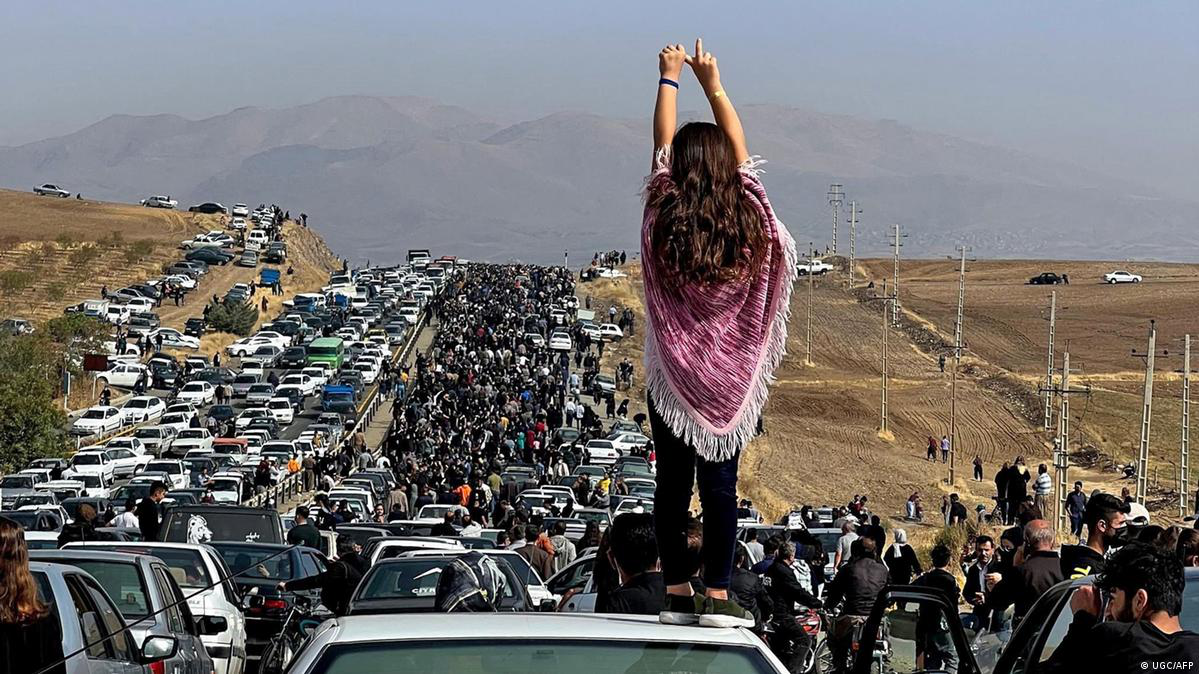

In [45]:
img

In [46]:
# resizes image in-place
img.thumbnail((64, 64))

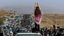

In [47]:
img

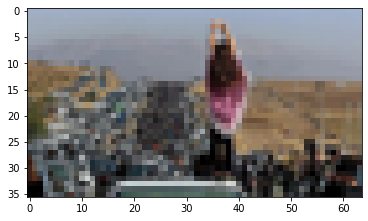

In [42]:
imgplot = plt.imshow(img)

Here we have the default interpolation, bilinear, since we did not
give [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow "matplotlib.pyplot.imshow") any interpolation argument.

Let's try some others. Here's "nearest", which does no interpolation.

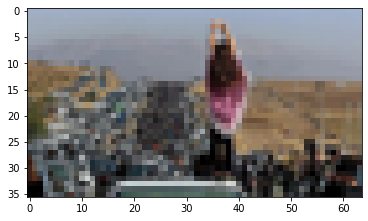

In [30]:
imgplot = plt.imshow(img, interpolation="nearest")

and bicubic:

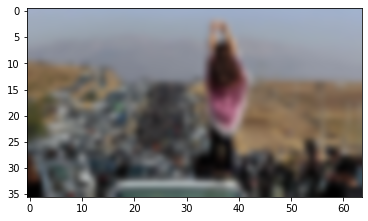

In [31]:
imgplot = plt.imshow(img, interpolation="bicubic")

Bicubic interpolation is often used when blowing up photos - people
tend to prefer blurry over pixelated.